In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def dates2num(dates_in):
    dates_out = []
    for period in dates_in:
        year = float(period.split('/')[1])
        month = float(period.split('/')[0])
        dates_out.append(year+month/12)
    return np.asarray(dates_out)

In [2]:
NHSdata = np.load('NHSwaiting.npy', allow_pickle=True)
names = NHSdata[0]
dates = dates2num(NHSdata[1])
attendance = NHSdata[2]
waiting = NHSdata[3]

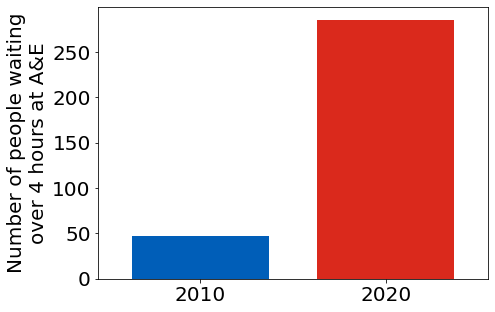

238222


In [3]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rc('font', size=20)

fig, ax1 = plt.subplots(figsize = (7,5))
time = np.arange(2010.25, 2020, 0.25)[::-1]

hospital = 0 

allBeds = waiting[hospital,:][waiting[hospital,:]!='-']

ax1.bar([time[-1], time[0]], [allBeds[-1]*1e-3, allBeds[0]*1e-3], 
        width = 7, alpha=1,tick_label = [2010, 2020], color = ['#005EB8', '#DA291C'])
ax1.set_xlim(2005, 2025)

ax1.set_ylabel("Number of people waiting\nover 4 hours at A&E")
plt.show()
print(allBeds[0]-allBeds[-1])

In [4]:
names

array(['England', 'Bedfordshire Hospitals NHS Foundation Trust',
       'Cambridge University Hospitals NHS Foundation Trust',
       'Clacton Hospital', 'East And North Hertfordshire NHS Trust',
       'East Suffolk And North Essex NHS Foundation Trust',
       'Fryatt Hospital', 'Hertfordshire Community NHS Trust',
       'Herts Urgent Care (Ascots Lane)',
       'James Paget University Hospitals NHS Foundation Trust',
       'Mid And South Essex NHS Foundation Trust',
       'Milton Keynes University Hospital NHS Foundation Trust',
       'Norfolk And Norwich University Hospitals NHS Foundation Trust',
       'North West Anglia NHS Foundation Trust',
       'Putnoe Medical Centre Walk In Centre',
       'The Princess Alexandra Hospital NHS Trust',
       "The Queen Elizabeth Hospital, King's Lynn, NHS Foundation Trust",
       'West Hertfordshire Hospitals NHS Trust',
       'West Suffolk NHS Foundation Trust',
       'Barking, Havering And Redbridge University Hospitals NHS Trust',